# Capstone Project: Chronic Kidney Disease 

# DTSC 691: Default Machine Learning Project 

# Name: David Charles 

# Introduction and Motivation

Chronic kidney disease is a grave health concern, affecting approximately 10% of the world's population, yet it remains undetected in a staggering number of cases. With its asymptomatic nature in the early stages, CKD can silently progress, leading to severe complications including kidney failure and cardiovascular diseases. Tragically, many individuals remain unaware of their condition until it reaches an advanced and often irreversible state. This is where our project gains significance – by harnessing the capabilities of machine learning, we aim to revolutionize the landscape of CKD diagnosis. If I can just save one life with my application, that would be the most rewarding thing for me. 

The goal of this project is to deploy a machine learning model to help doctors determine if their patient has Chronic Kidney disease or not. In a world where early detection can mean the difference between life and death, my project delves into the realm of healthcare with a mission to transform the lives of those that can be affected by this debilitating illness. CKD, a silent predator, affects millions globally, often progressing unnoticed until irreversible damage sets in. 

I personally know people that have succumb to this illness and they often find out about it when CKD is in it's late stages. I've decided to do some research on how CKD is diagnosed and what tests doctors conduct to diagnose their patients. I wanted to combine my knowledge of Machine Learning and coding skills to build an application that is easy to use for anyone.

All of the analysis and model building was done in Jupyter Notebook where I was able to select the best model for my use case. Although I tested a couple of models, ideally, I wanted to deploy a Decision Tree for my Streamlit application as an API using Flask. The reason being is because Decision Tree is easily interpretable and anyone can understand the output. A doctor can ask for Decision Tree and look at variables that are the most important predictor of Chronic Kidney Disease. 

The application is hosted on an EC2 instance and is hosted within two separate docker containers, one for streamlit and one for Flask. I also created IAM credentials specifically for the grader to simply get access to the EC2 instance. After the EC2 instance has been started, it will be stopped within 2 hours and the credentials will be revoked.

# Data Information 

### Variable Information
https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease#
- age - age
- bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - hemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia
- class - class



This dataset has 400 observations and is from the Chronic Kidney Disease dataset from UC Irvine Machine Learning Repository. This dataset contains medical records of patients with and without chronic kidney disease, and it will serve as the foundation for training and testing My machine learning model. The class variable indicates whether the patient has CKD or not.

### Variable Description
Age: Represents the age of the patient in years, providing insight into their age group.

Blood Pressure: Includes two sub-variables, systolic and diastolic blood pressure values, crucial indicators of cardiovascular health and potential signs of kidney disease.

Specific Gravity: Indicates the specific gravity of the patient's urine, a measure of urine concentration and potential kidney dysfunction.

Albumin: Represents the concentration of albumin, a protein, in the patient's urine. Elevated levels may suggest kidney damage.

Sugar: Indicates the presence of sugar in the patient's urine, which can be a sign of diabetes or other health conditions.

Red Blood Cells: Indicates the presence of red blood cells in the patient's urine, possibly indicating kidney problems or other issues.

Pus Cell: Represents the presence of pus cells in the patient's urine, a potential sign of infection or inflammation affecting kidney health.

Pus Cell clumps: Indicates the presence of clumps of pus cells in the patient's urine.

Bacteria: Represents the presence of bacteria in the patient's urine, which can indicate an infection affecting the kidneys.

Blood Glucose Random: Represents the random blood glucose level, an essential indicator for diabetes diagnosis.

Blood Urea: Indicates the concentration of urea in the patient's blood, relevant for assessing kidney function.

Serum Creatinine: Represents the level of creatinine in the patient's blood, an essential parameter for evaluating kidney health.

Sodium: Indicates the sodium level in the patient's blood, which can impact kidney function.

Potassium: Represents the potassium level in the patient's blood, relevant for assessing kidney health.

Hemoglobin: Indicates the concentration of hemoglobin in the patient's blood, essential for assessing anemia, which can be related to kidney disease.

Packed Cell Volume: Represents the volume of red blood cells in the patient's blood.

White Blood Cell Count: Indicates the count of white blood cells in the patient's blood, which can indicate inflammation or infection affecting kidney health.

Red Blood Cell Count: Represents the count of red blood cells in the patient's blood, important for detecting anemia and its association with kidney disease.

Hypertension: This binary variable indicates whether the patient has hypertension (yes or no), a significant risk factor for kidney disease.

Diabetes Mellitus: Indicates whether the patient has diabetes mellitus (yes or no), another significant risk factor for chronic kidney disease.

Coronary Artery Disease: Indicates the presence or absence of coronary artery disease, relevant for evaluating the patient's heart health, which can impact kidney function.

Appetite: Represents the patient's appetite, which can be affected by kidney disease.

Pedal Edema: Indicates the presence of pedal edema (swelling of the feet and ankles) in the patient, potentially related to kidney problems.

Anemia: This binary variable indicates the presence or absence of anemia in the patient, which can be associated with kidney disease.

Chronic Kidney Disease (Target Variable): This binary variable indicates whether the patient has chronic kidney disease (yes or no), serving as the target variable for My machine learning model.


# Load Packages

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
kidney_disease_medical_data = pd.read_csv('../data/kidney_disease.csv')

# Inspect Data 

In [159]:
kidney_disease_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [160]:
kidney_disease_medical_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## How is Chronic Kidney Disease (CKD) diagnosed?
Source - https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/diagnosis-treatment/drc-20354527
- Blood tests. 
    - Kidney function tests look for the level of waste products, such as creatinine and urea, in your blood.
- Urine tests. 
    - Analyzing a sample of your urine can reveal abnormalities that point to chronic kidney failure and help identify the cause of chronic kidney disease.
- Imaging tests. 
    - Your doctor might use ultrasound to assess your kidneys' structure and size. Other imaging tests might be used in some cases.
- Removing a sample of kidney tissue for testing

In [163]:
# number of patients
kidney_disease_medical_data['id'].nunique()

400

## Calculate BUN (Blood Urea Nitrogren) to Creatinine Ratio
- Measures level of Blood Urea Nitrogen and Creatinine in bloodstream. 
- Blood sample is taken from patient to assess if they have CKD

Normal Ratio = BUN-Creatinine Ratio 10:1 or 20:1, for every 10/20 parts of Blood Urea Nitrogren found in the blood, you can expect there is at least one Creatinine part.

High Ratio (Increased Bun) = Could indicate dehydration, gastrointestinal bleeding or other issues that can lead an increased breakdown of proteins

Low Ratio = Could indicate low-protein diet or liver disease

In [16]:
# calculate bun to creatinine ratio
kidney_disease_medical_data['blood_urea_creatinine_ratio'] = kidney_disease_medical_data.apply(lambda x: x.bu/x.sc, axis=1)

# Albumin to Creatinine Ratio
- Alumin = Protein, increased presence of this protein in urine could indicate kidney dysfunction
- Creatinine = Waste from Muscle Metabolism - usually filtered out of the body by kidneys, elevated levels could indicate decreased kidney function since kidneys are responsible for clearing creatinine from the bloodstream

Normal ACR = below 30 mg/g
Increased ACR = [30, 300] mg/g - early sign of CKD
High ACR = above 300 mg/g, significant kidney damage, advanced stages of CKD

Since the Albumin column in this dataset is nominal, it only has values 1-5, which isn't clearly explained by the authors, which makes calculating ACR impossible.

## Explore Age Range

<Axes: title={'center': 'Age Boxplot'}>

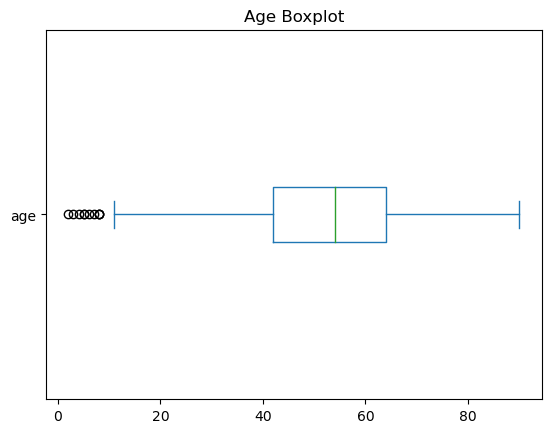

In [166]:
# plot boxplot for age range
# Median age is 54, min age is 2 and max age is 90
kidney_disease_medical_data['age'].plot(kind='box', vert=False, title='Age Boxplot')

## Data Cleaning

In [8]:
# data entry issue: ckd\t
kidney_disease_medical_data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [9]:
# clean ckd\t
kidney_disease_medical_data.replace('ckd\t', 'ckd', inplace=True)

kidney_disease_medical_data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [189]:
for c in kidney_disease_medical_data.select_dtypes('object').columns:
    print(f"---- {c} ---")
    print(kidney_disease_medical_data[c].unique())

---- rbc ---
['normal' 'abnormal']
---- pc ---
['normal' 'abnormal' nan]
---- pcc ---
['notpresent' 'present' nan]
---- ba ---
['notpresent' 'present' nan]
---- htn ---
['yes' 'no']
---- dm ---
['yes' 'no']
---- cad ---
['no' 'yes']
---- appet ---
['good' 'poor']
---- pe ---
['no' 'yes']
---- ane ---
['no' 'yes']
---- classification ---
['ckd' 'notckd']


In [21]:
# clean data with "\t" in it
kidney_disease_medical_data = kidney_disease_medical_data.replace(r'\t', '', regex=True)

In [22]:
# replace ? with 0

kidney_disease_medical_data = kidney_disease_medical_data.replace('?', '0')

In [23]:
for c in kidney_disease_medical_data.select_dtypes('object').columns:
    print(f"---- {c} ---")
    print(kidney_disease_medical_data[c].unique())

---- rbc ---
[nan 'normal' 'abnormal']
---- pc ---
['normal' 'abnormal' nan]
---- pcc ---
['notpresent' 'present' nan]
---- ba ---
['notpresent' 'present' nan]
---- pcv ---
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '0' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
---- wc ---
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '0' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100'

In [27]:
kidney_disease_medical_data['dm'].value_counts() # extra space found in yes

no      261
yes     136
 yes      1
Name: dm, dtype: int64

In [28]:
# remove space
kidney_disease_medical_data['dm'] = kidney_disease_medical_data['dm'].str.strip()

In [29]:
kidney_disease_medical_data['dm'].value_counts()

no     261
yes    137
Name: dm, dtype: int64

## Visualizations

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
import plotly.express as px

/var/folders/_s/6p3493gn3cl7krkpzh8cq_700000gn/T/ipykernel_61325/3149548828.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kidney_disease_medical_data.corr(), annot=True, linewidths=2)


<Axes: >

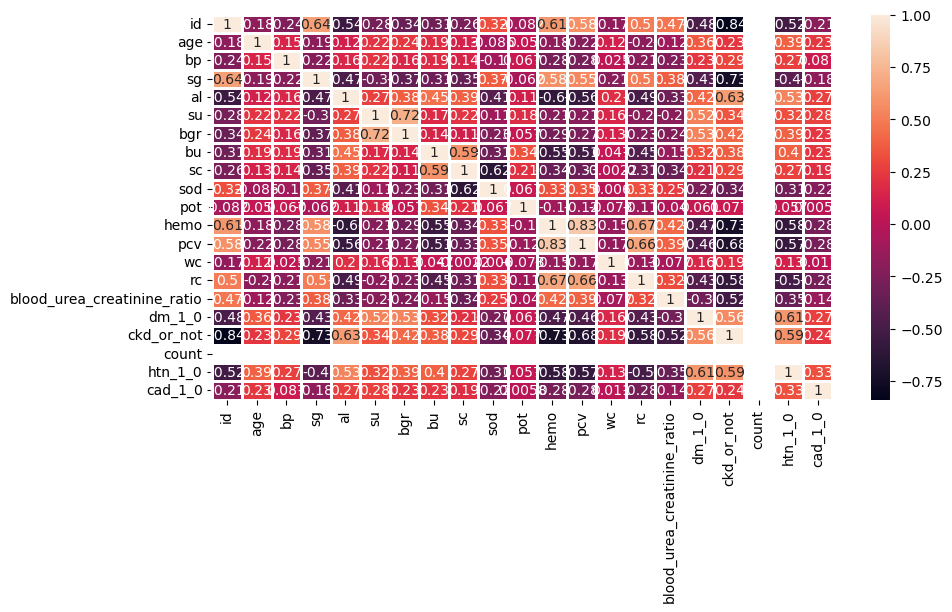

In [168]:
# diabetes - secondary cause
# hypertension (high blood pressure) - 2nd most common cause 
# coronary - pump blood to heart so if there is junk that can cause heart disease or cardiac arrest
# ckd - end stage renal disease (kidney not functioning need dialysis)
plt.figure(figsize=(10, 5))
sns.heatmap(kidney_disease_medical_data.corr(), annot=True, linewidths=2)

In [201]:
# plot violin based on column
def violin(col, data):
    fig = px.violin(data_frame=data, y=col, x="classification", color="classification", box=True)
    return fig.show()

# Function for creating boxplots
def boxplot(col, data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x="classification", y=col)
    plt.title(f"Boxplot of {col} by class")
    plt.xlabel("Class")
    plt.ylabel(col)
    plt.show()
    
# Function for creating histograms
def histogram(col, data, classification):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data[data['classification'] == classification], x=col, hue="classification", multiple="stack", bins=20)
    plt.title(f"Histogram of {col} by {classification}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(title="Class")
    plt.show()
    
def kde(col, data):
    grid = sns.FacetGrid(data, hue="classification", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()


In [185]:
violin('bp', kidney_disease_medical_data) # high blood pressure in patients with CKD

In [186]:
violin('sc', kidney_disease_medical_data) # creatinine waste not being filtered out in CKD patients leading to elevated levels

In [187]:
violin('bu', kidney_disease_medical_data) # high blood urea levels found in bloodstream in patients with CKD

# Serum Creatinine is one of the key indicators of Chronic Kidney Disease

In [10]:
# where classification = ckd
condition_1 = kidney_disease_medical_data['classification'] == 'ckd'

In [11]:
# where classification = notckd
condition_2 = kidney_disease_medical_data['classification'] == 'notckd'

In [14]:
# descriptive stats for non-ckd patients and their serum creatinine levels
kidney_disease_medical_data[condition_2]['sc'].plot(kind='boxplot')

count    145.000000
mean       0.868966
std        0.255092
min        0.400000
25%        0.600000
50%        0.900000
75%        1.100000
max        1.200000
Name: sc, dtype: float64

In [15]:
# descriptive stats for ckd patients and their serum creatinine levels
# safe to say anyone with a serum creatinine level > 1.4 is at risk of having ckd
kidney_disease_medical_data[condition_1]['sc'].describe()

count    238.000000
mean       4.414916
std        6.950275
min        0.500000
25%        1.425000
50%        2.250000
75%        4.550000
max       76.000000
Name: sc, dtype: float64

In [17]:
# over 80% of patients with a blood urea creatinine ratio less than 20 have ckd
kidney_disease_medical_data[kidney_disease_medical_data['blood_urea_creatinine_ratio']<20]['classification'].value_counts(normalize=True)


ckd       0.828829
notckd    0.171171
Name: classification, dtype: float64

In [18]:
# pretty even - high bun-creatinine ratio could be due to dehydration not ckd
# https://drinkmagnak.com/the-bun-creatinine-ratio-understanding-biomarkers-of-hydration-and-kidney-function/
kidney_disease_medical_data[kidney_disease_medical_data['blood_urea_creatinine_ratio']>20]['classification'].value_counts(normalize=True)


ckd       0.532567
notckd    0.467433
Name: classification, dtype: float64

# Bayes Theorem
- Use cross tab/frequency table to easily calculate P (Patient has CKD | B) where B is the condition the patient has and whether it is a key indicator of CKD

- P (Patient has CKD | Patient has Diabetes)
- P (Patient has CKD | Patient has Hypertension)

In [30]:
kidney_disease_medical_data['dm_1_0'] = np.where(kidney_disease_medical_data['dm']=='yes', 1, 0)

In [31]:
kidney_disease_medical_data['ckd_or_not'] = np.where(kidney_disease_medical_data['classification']=='ckd', 1, 0)

In [32]:
kidney_disease_medical_data['count'] = 1

In [33]:
pd.pivot_table(kidney_disease_medical_data, values='count', index='dm_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0)

ckd_or_not,0,1
dm_1_0,,
0,150,113
1,0,137


# Patients with diabetes have ckd
- Patients with diabetes have a 34% chance of having ckd
    - Consistently elevated glucose levels can damage blood vessels in kidneys and leade to diabetic nephropathy, kidney damaged caused by diabetes.
    - Diabetes often has a synergistic effect, diabetics tend to have high blood pressure and high cholesterol, which can further accelerate kidney damage
- Patients with hypertension have a 37% chance of having ckd
    - Prolonged high blood pressure can damage blood vessels in kidneys, leader to reduced kidney function over time. 

In [34]:
137/pd.pivot_table(kidney_disease_medical_data, values='count', index='dm_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0).sum().sum()

0.3425

In [35]:
kidney_disease_medical_data['htn_1_0'] = np.where(kidney_disease_medical_data['htn']=='yes', 1, 0)

In [36]:
147/pd.pivot_table(kidney_disease_medical_data, values='count', index='htn_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0).sum().sum()

0.3675

# What is the probability of getting CKD given the patient has Coronary Artery Disease?
- 8.5% someone will have CKD if they have coronary artery disease

In [37]:
kidney_disease_medical_data['cad_1_0'] = np.where(kidney_disease_medical_data['cad']=='yes', 1, 0)

In [38]:
pd.pivot_table(kidney_disease_medical_data, values='count', index='cad_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0)

ckd_or_not,0,1
cad_1_0,,
0,150,216
1,0,34


In [64]:
34/400

0.085

## Explore Missing data 

<Axes: title={'center': 'Missing Values'}>

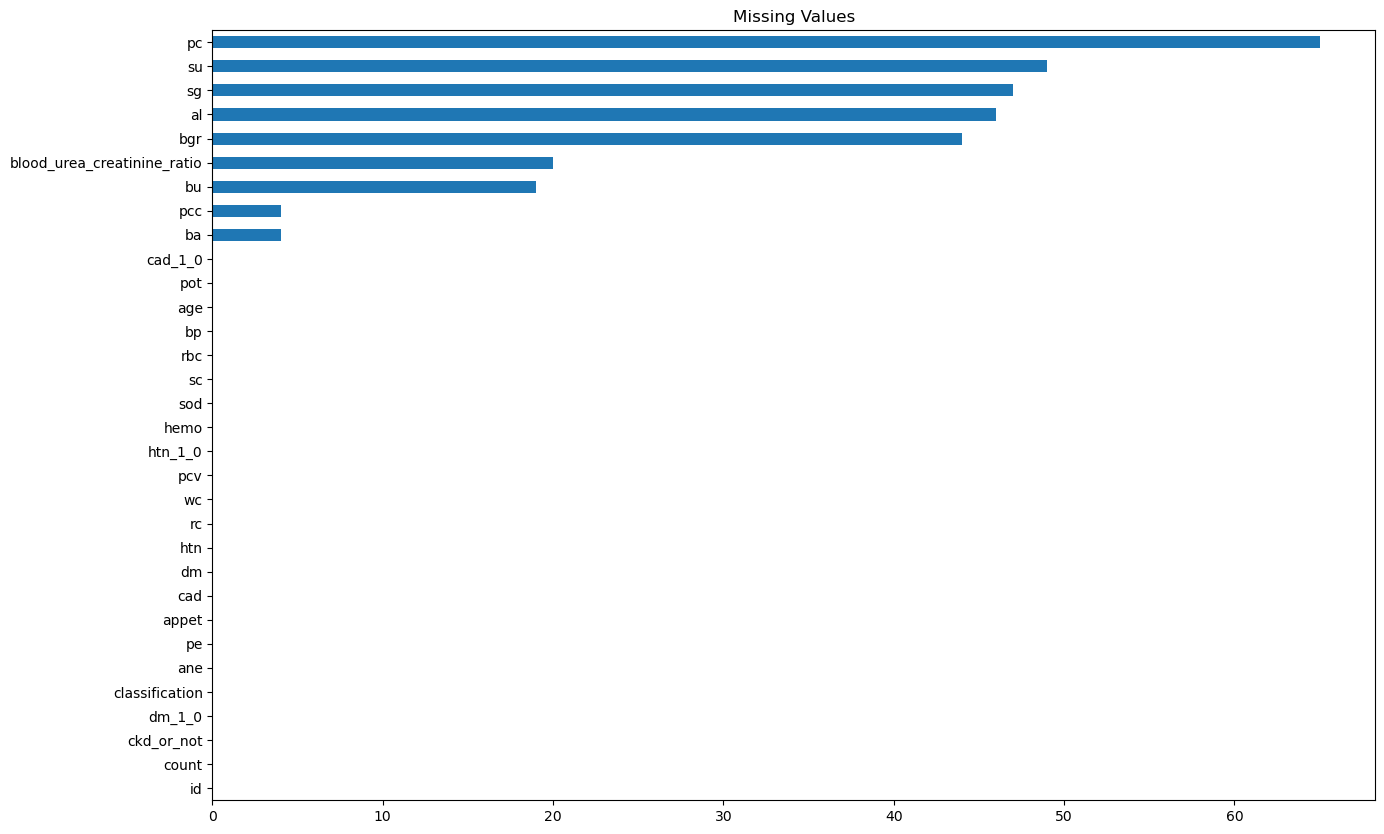

In [202]:
kidney_disease_medical_data.isna().sum().sort_values(ascending=True).plot(kind='barh', figsize=(15,10), title='Missing Values')

## Data Preprocessing 

In [217]:
# convert pcv, wc and rc into float
kidney_disease_medical_data[['pcv', 'wc', 'rc']] = kidney_disease_medical_data[['pcv', 'wc', 'rc']].astype(float)

In [218]:
# fill na with mean depending on column
def replaceNAWithMean(df, column):
    df[column] = df[column].fillna(df[column].mean())

In [219]:
def replaceNAWithMode(df, column):
    df[column] = df[column].fillna(df[column].mode()[0])

In [220]:
# replace missing values in numeric columns with mean of column
for col in kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].select_dtypes(exclude='object').columns:
    replaceNAWithMean(kidney_disease_medical_data, col)

In [221]:
# replace missing values in object columns with mode or most frequently occuring value
for col in kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].select_dtypes('object').columns:
    replaceNAWithMode(kidney_disease_medical_data, col)

In [222]:
# columns to train model on and preprocess data
X_features = ['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']

In [223]:
# check for missing data
kidney_disease_medical_data[X_features].isna().sum()

bp       0
rbc      0
rc       0
wc       0
pcv      0
cad      0
appet    0
sc       0
sod      0
pot      0
hemo     0
htn      0
dm       0
ane      0
age      0
pe       0
dtype: int64

# Model Building
- Logistic Regression
- Decision Tree
- Bayes Theorem


Since there a bit of imbalance in the dataset, I will use a oversampling technique called Synthetic Minority Oversample Technique (SMOTE) to balance the training data only.

In [225]:
X = kidney_disease_medical_data[X_features]
y = kidney_disease_medical_data['classification']

In [226]:
# feature engineer columns
X = pd.get_dummies(kidney_training_data, drop_first=True, columns=['rbc', 'cad', 'appet', 'htn', 'dm', 'ane', 'pe'])
y = kidney_disease_medical_data['classification']

In [228]:
from sklearn.preprocessing import LabelEncoder

In [229]:
label_enc = LabelEncoder()

In [230]:
y = label_enc.fit_transform(y) # convert classification to 0 and 1

In [231]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [301]:
kidney_disease_medical_data['classification'].value_counts() # slight imbalance

ckd       250
notckd    150
Name: classification, dtype: int64

## Logistic Regression 

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
from sklearn.metrics import confusion_matrix, classification_report

In [236]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # split into train and test

In [238]:
from imblearn.over_sampling import SMOTE

In [239]:
sm = SMOTE()

In [240]:
X_train, y_train = sm.fit_resample(X_train, y_train) # resample training data to fix imbalance

In [241]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [242]:
lr_predictions = log_reg.predict(X_test) # prediction

In [282]:
# create function to add model confusion matrix to df
def models_confusion_matrix_to_df(y_test, model_predictions, model_str_name, df):
    tn, fp, fn, tp = confusion_matrix(y_test, model_predictions).ravel() # get confusion report numbers
    
    if df.empty:
        
        # create dataframe to store tn, tp, fp and fn
        df = pd.DataFrame({'model_name': model_str_name, 'true negative': tn, 'true positive': tp, 'false positive': fp, 'false negative': fn}, index=[0])
        
        
    else:
        # Create a new row with values
        new_row = {'model_name': model_str_name, 'true negative': tn, 'true positive': tp, 'false positive': fp, 'false negative': fn}

        # Use the loc indexer to insert the new row at the end of the DataFrame
        df = df.append(new_row, ignore_index=True)
    
    return df

In [283]:
models_confusion_matrix_res = pd.DataFrame()

In [284]:
models_confusion_matrix_res = models_confusion_matrix_to_df(y_test, lr_predictions, 'logistic regression', models_confusion_matrix_res)

In [285]:
models_confusion_matrix_res

,model_name,true negative,true positive,false positive,false negative
0,logistic regression,75,44,1,0


# Classification Metrics
- This wouldn't tell us much for an imbalanced dataset
- You could have a high accuracy, but you would still need to inspect the precision and recall.
- Minimize precision when we need to minimize false positives
    - A model that misclassifies patients with CKD will cause the hospital to allocate unnceccesary resources to these patients and cut into profits for the year. 
- Minimize recall when we need to minimize false negatives
    - Failing to detect when someone has Kidney disease could result in a fatal event.

# Accuracy
- $ \frac{TP+TN}{TP+TN+FP+FN} $
    

# Precision
- $ \frac{TP}{TP+FP} $
- No false positives would make this equation 1

# Recall
- $ \frac{TP}{TP+FN} $
- No false negatives would make this equation 1

# F1
- $ 2*\frac{\text{precision}*\text{recall}}{\text{precision}+\text{recall}} $
- harmonic mean of precision and recall.
- if recall and precision is 1 then this equation will be 1




In [124]:
# look at classification report for logistic regression
print(classification_report(y_test, lr_predictions)) # model was able to distinguish between ckd and non ckd patients

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<Axes: >

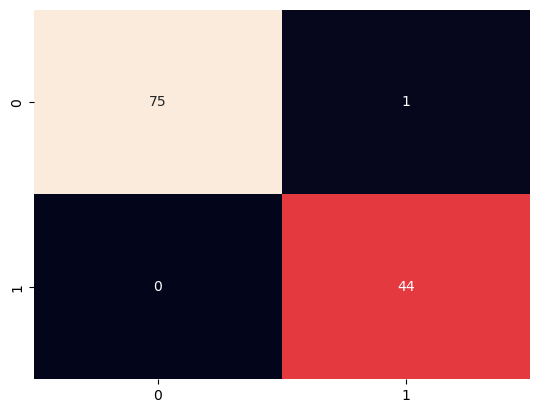

In [125]:
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, cbar=False)

In [126]:
# 98% accurate
log_reg.score(X_test, y_test) # accuracy tells one story, but not the whole story

0.9916666666666667

In [127]:
log_reg.score(X_train, y_train)

0.9540229885057471

In [246]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Plot ROC and AUC 
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
- When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.

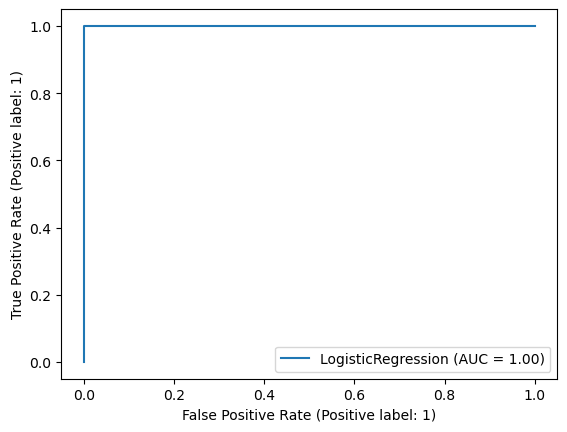

In [247]:
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

# Feature Importance Analysis 
- Look at Coefficients
- Recursive Feature Elimination

## Look at feature importance based on coefficients 

In [88]:
log_reg.feature_names_in_

array(['bp', 'rc', 'wc', 'pcv', 'sc', 'sod', 'pot', 'hemo', 'age',
       'rbc_normal', 'cad_yes', 'appet_poor', 'htn_yes', 'dm_yes',
       'ane_yes', 'pe_yes'], dtype=object)

In [89]:
lr_feature_importance = dict(zip(log_reg.feature_names_in_, log_reg.coef_[0]))
lr_feature_importance

{'bp': -0.08020203443314707,
 'rc': 1.2475610654859097,
 'wc': -0.00015185092175474708,
 'pcv': 0.0072986262728140594,
 'sc': -1.3517982316288069,
 'sod': -0.05660365430956082,
 'pot': -0.7673898130250114,
 'hemo': 0.9805374399020245,
 'age': 0.01618863360783669,
 'rbc_normal': 0.9181322962903864,
 'cad_yes': -0.18167038247536443,
 'appet_poor': -0.9987355925217,
 'htn_yes': -1.6290723573167416,
 'dm_yes': -2.0757413517696044,
 'ane_yes': -0.26539845340423224,
 'pe_yes': -1.536492857578798}

In [90]:
marklist = sorted(lr_feature_importance.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)

In [91]:
sortdict

{'rc': 1.2475610654859097,
 'hemo': 0.9805374399020245,
 'rbc_normal': 0.9181322962903864,
 'age': 0.01618863360783669,
 'pcv': 0.0072986262728140594,
 'wc': -0.00015185092175474708,
 'sod': -0.05660365430956082,
 'bp': -0.08020203443314707,
 'cad_yes': -0.18167038247536443,
 'ane_yes': -0.26539845340423224,
 'pot': -0.7673898130250114,
 'appet_poor': -0.9987355925217,
 'sc': -1.3517982316288069,
 'pe_yes': -1.536492857578798,
 'htn_yes': -1.6290723573167416,
 'dm_yes': -2.0757413517696044}

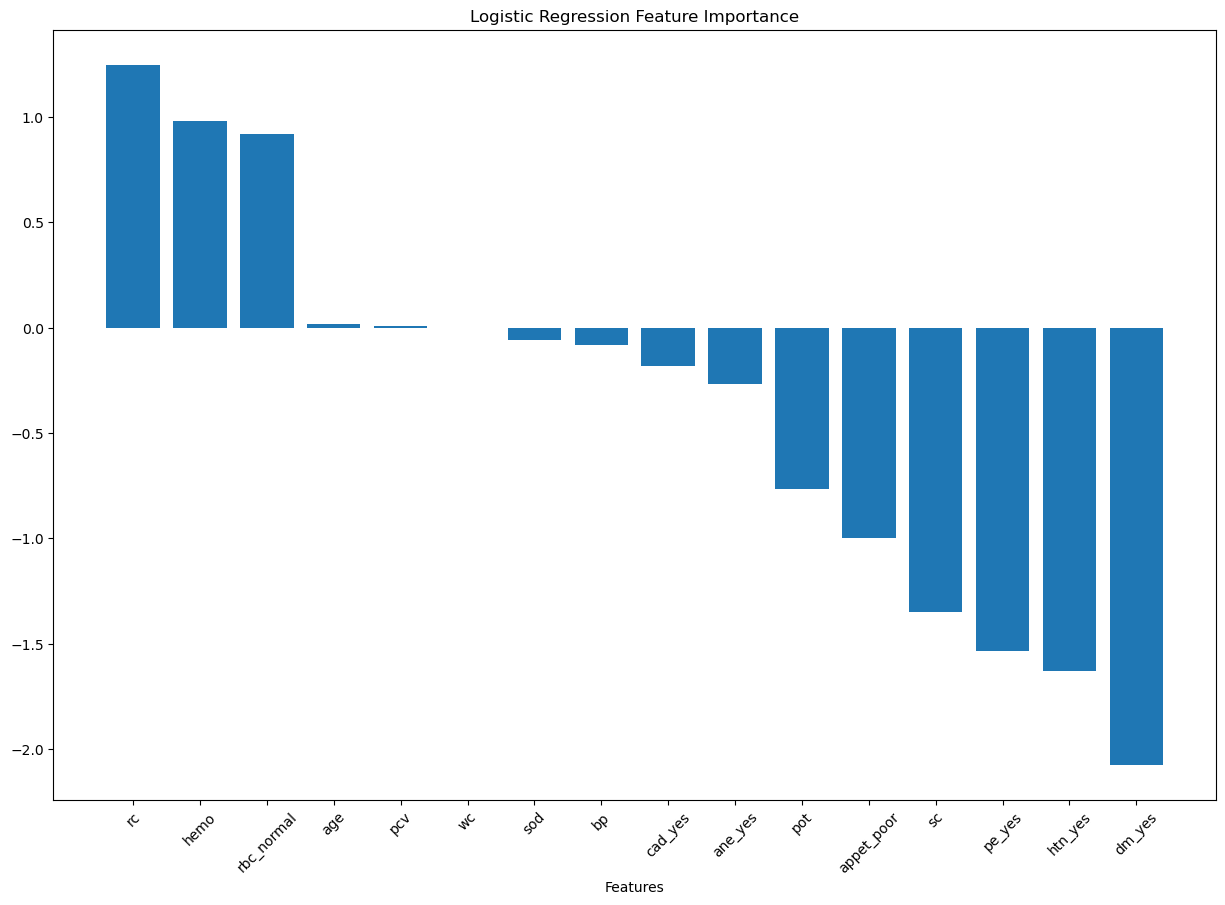

In [92]:
plt.figure(figsize=(15,10))
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Features')
plt.bar(sortdict.keys(), sortdict.values())
plt.xticks(rotation = 45)
plt.show()


# Recursive Feature Elimination

In [93]:
from sklearn.feature_selection import RFE

In [94]:
feature_selector = RFE(log_reg, n_features_to_select=10)

In [95]:
# fit features
feature_selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

# Train Logistic Regression on top 10 features and see if it improves model score 
- ideally all of this would be in a sklearn pipeline that would do this automatically
- You can also use gridsearch in the pipelne
    - see if l1 penalty would remove the need to do any feature selection since that would make less important coefficients zero

In [96]:
X_train.columns[feature_selector.support_]

Index(['rc', 'sc', 'pot', 'hemo', 'rbc_normal', 'appet_poor', 'htn_yes',
       'dm_yes', 'ane_yes', 'pe_yes'],
      dtype='object')

In [97]:
log_reg.fit(X_train[X_train.columns[feature_selector.support_]], y_train)

LogisticRegression(max_iter=1000)

In [98]:
lr_predictions_rfe = log_reg.predict(X_test[X_train.columns[feature_selector.support_]])

In [99]:
log_reg.score(X_test[X_train.columns[feature_selector.support_]], y_test)

0.9916666666666667

In [100]:
# precision, recall and f1 score is 1
print(classification_report(y_test, lr_predictions_rfe))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<Axes: >

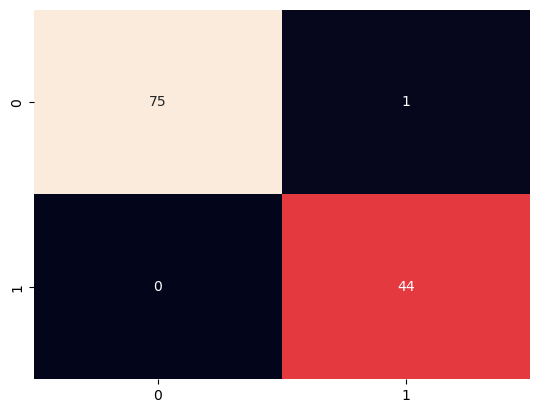

In [101]:
# perfectly predicted ckd
sns.heatmap(confusion_matrix(y_test, lr_predictions_rfe), annot=True, cbar=False)

# Decision Tree 

In [248]:
from sklearn.tree import DecisionTreeClassifier

In [249]:
dt = DecisionTreeClassifier(random_state=42)

In [250]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [251]:
dt_predictions = dt.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

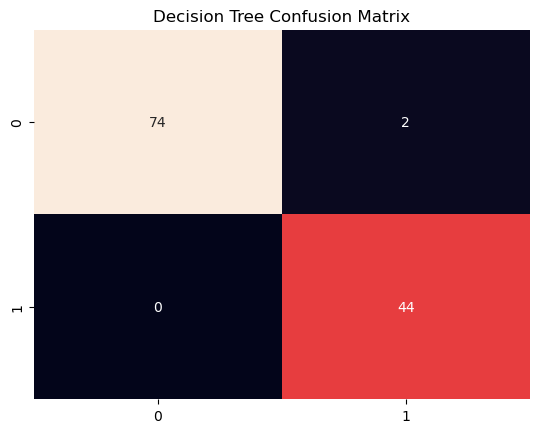

In [252]:
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, cbar=False)
plt.title('Decision Tree Confusion Matrix')

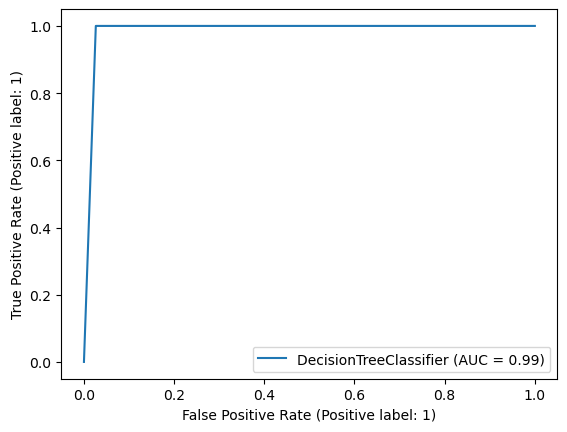

In [253]:
RocCurveDisplay.from_estimator(dt, X_test, y_test)

In [288]:
models_confusion_matrix_res = models_confusion_matrix_to_df(y_test, dt_predictions, 'decision tree', models_confusion_matrix_res)

/var/folders/_s/6p3493gn3cl7krkpzh8cq_700000gn/T/ipykernel_61325/4176267299.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [289]:
models_confusion_matrix_res

,model_name,true negative,true positive,false positive,false negative
0,logistic regression,75,44,1,0
1,decision tree,74,44,2,0


In [290]:
dt.feature_importances_

array([0.01129181, 0.00862069, 0.02167962, 0.        , 0.04213275,
       0.02777539, 0.00766284, 0.74671446, 0.01383553, 0.        ,
       0.        , 0.        , 0.04189769, 0.07838922, 0.        ,
       0.        ])

In [291]:
dt.feature_names_in_

array(['bp', 'rc', 'wc', 'pcv', 'sc', 'sod', 'pot', 'hemo', 'age',
       'rbc_normal', 'cad_yes', 'appet_poor', 'htn_yes', 'dm_yes',
       'ane_yes', 'pe_yes'], dtype=object)

In [292]:
dict(zip(dt.feature_names_in_, dt.feature_importances_))

{'bp': 0.011291813195386283,
 'rc': 0.008620689655172412,
 'wc': 0.021679617288388593,
 'pcv': 0.0,
 'sc': 0.042132754181435694,
 'sod': 0.027775394599351046,
 'pot': 0.0076628352490421435,
 'hemo': 0.7467144563918758,
 'age': 0.013835530613449465,
 'rbc_normal': 0.0,
 'cad_yes': 0.0,
 'appet_poor': 0.0,
 'htn_yes': 0.04189768734385229,
 'dm_yes': 0.07838922148204625,
 'ane_yes': 0.0,
 'pe_yes': 0.0}

In [293]:
dt.score(X_test, y_test)

0.9833333333333333

In [294]:
from sklearn import tree

In [295]:
text_representation = tree.export_text(dt, feature_names=dt.feature_names_in_.tolist()) # get tree structure
print(text_representation)

|--- hemo <= 12.91
|   |--- sc <= 1.15
|   |   |--- sod <= 142.50
|   |   |   |--- sc <= 1.05
|   |   |   |   |--- sod <= 139.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sod >  139.50
|   |   |   |   |   |--- sc <= 0.85
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- sc >  0.85
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- sc >  1.05
|   |   |   |   |--- pot <= 3.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pot >  3.80
|   |   |   |   |   |--- class: 1
|   |   |--- sod >  142.50
|   |   |   |--- class: 1
|   |--- sc >  1.15
|   |   |--- class: 0
|--- hemo >  12.91
|   |--- dm_yes <= 0.50
|   |   |--- htn_yes <= 0.50
|   |   |   |--- wc <= 11750.00
|   |   |   |   |--- age <= 11.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  11.50
|   |   |   |   |   |--- sc <= 7.29
|   |   |   |   |   |   |--- bp <= 85.00
|   |   |   |   |   |   |   |--- age <= 18.50
|   |   |   |   |   |   |   |   |--- rc <= 5.05
|   |   |   |   |   

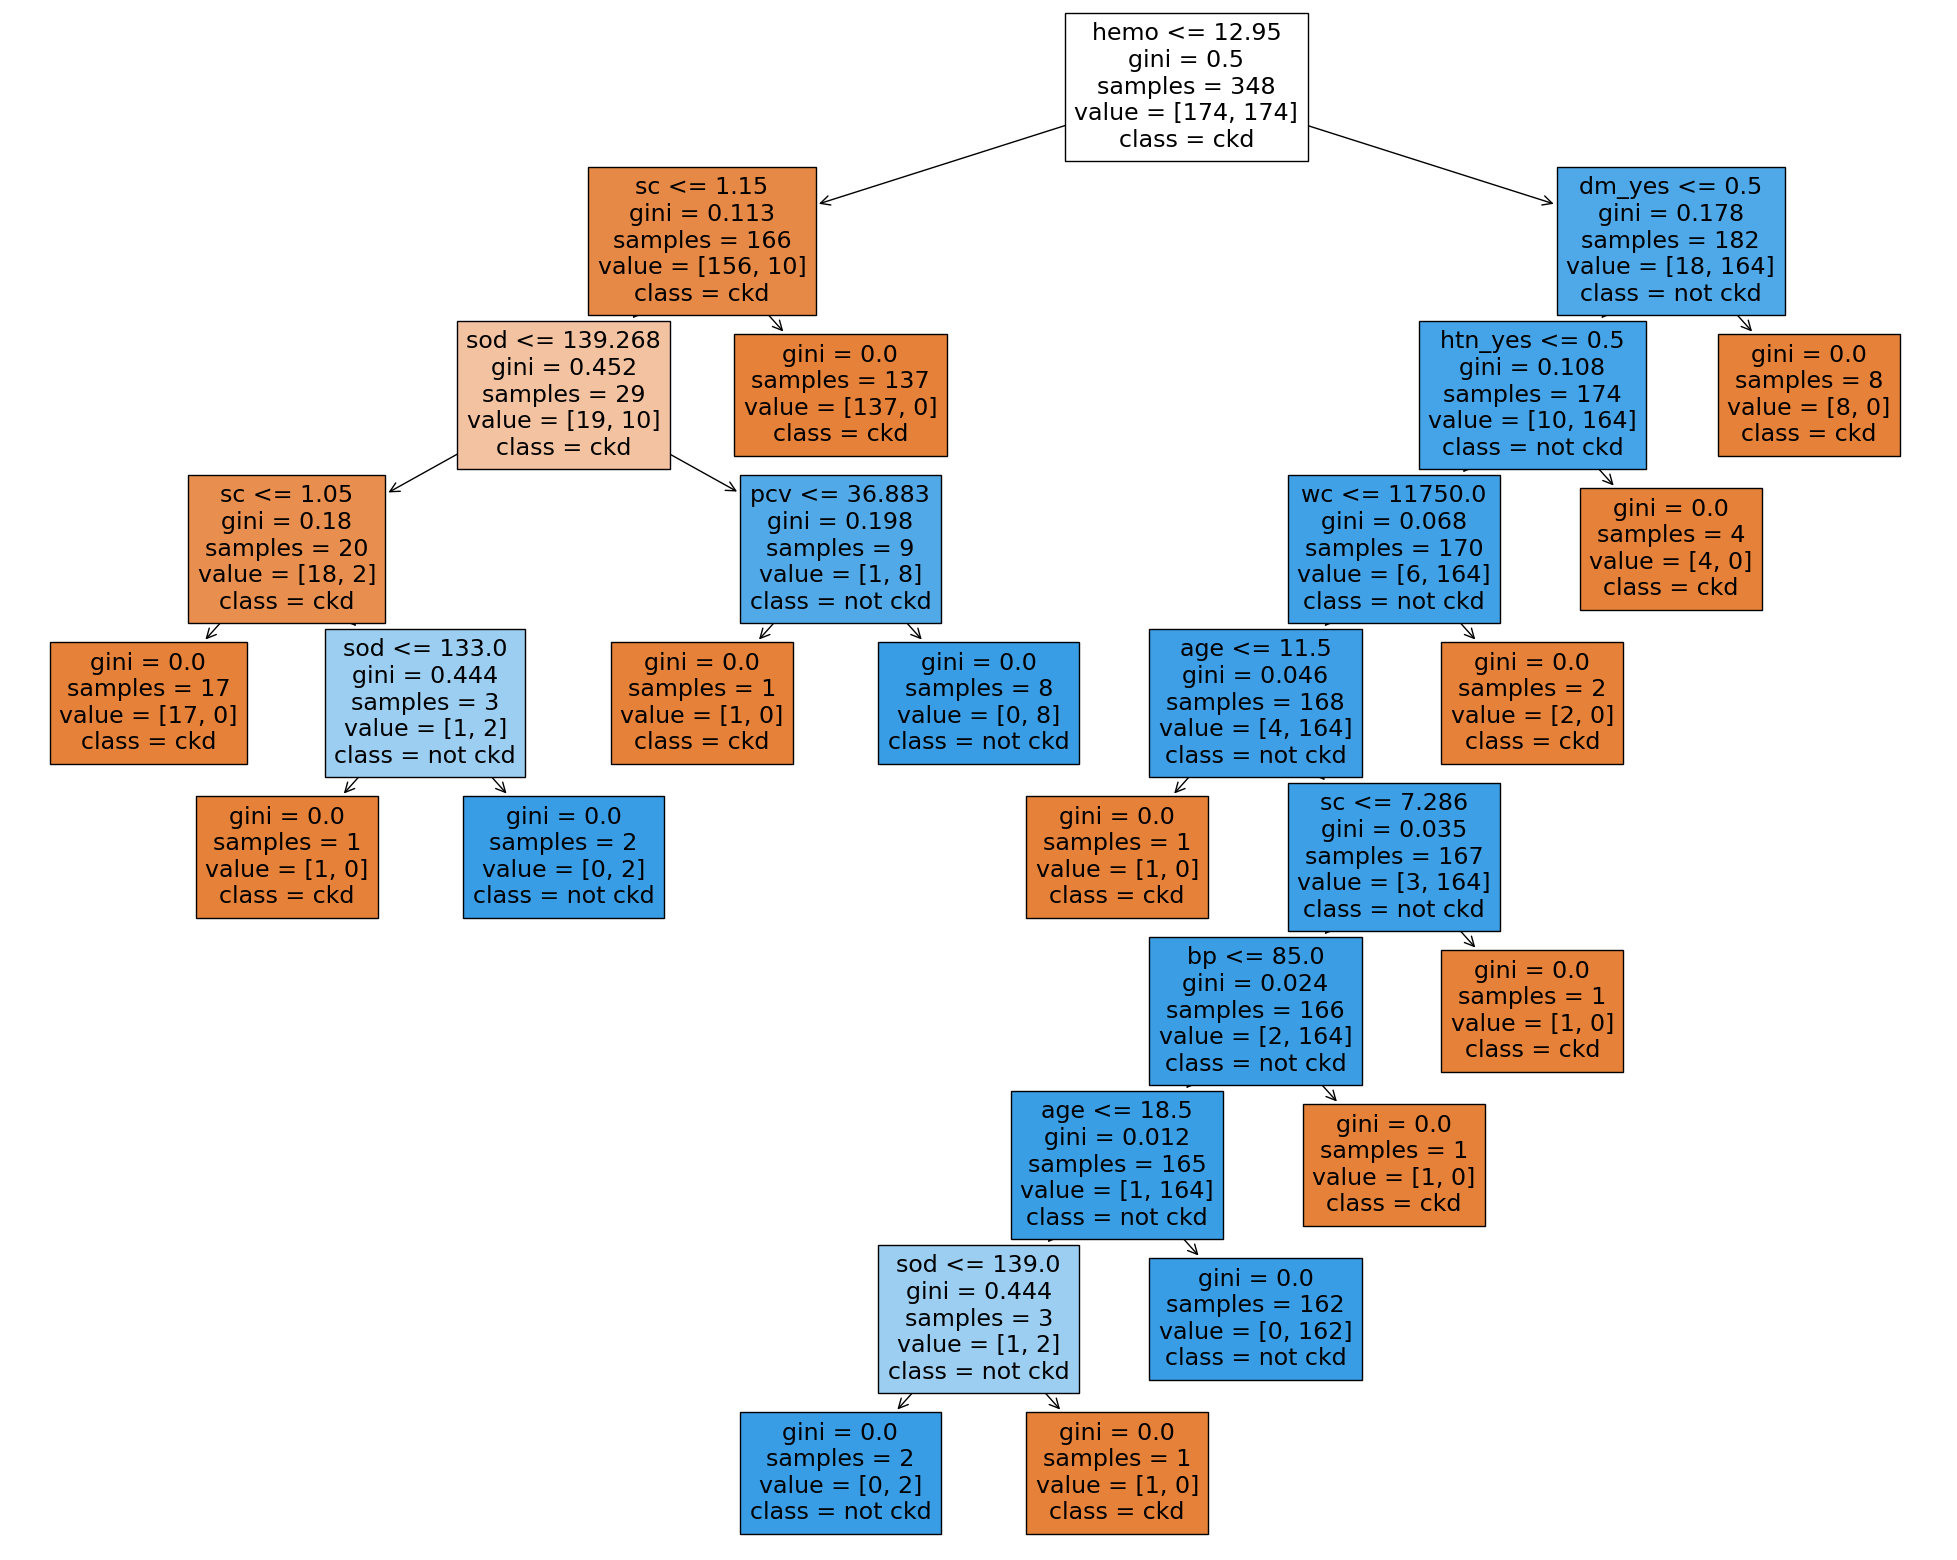

In [142]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=dt.feature_names_in_,  
                   class_names=['ckd','not ckd'],
                   filled=True)

In [254]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



# Bayes Theorem


In [303]:
from sklearn.naive_bayes import GaussianNB 

In [304]:
gaussian_nb = GaussianNB()

In [305]:
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [306]:
gauss_nb_pred = gaussian_nb.predict(X_test)

In [308]:
models_confusion_matrix_res = models_confusion_matrix_to_df(y_test, gauss_nb_pred, 'gaussian naive bayes', models_confusion_matrix_res)

/var/folders/_s/6p3493gn3cl7krkpzh8cq_700000gn/T/ipykernel_61325/4176267299.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [309]:
models_confusion_matrix_res

,model_name,true negative,true positive,false positive,false negative
0,logistic regression,75,44,1,0
1,decision tree,74,44,2,0
2,gaussian naive bayes,68,44,8,0


### Final Model Selection

I decided to go with Decision Tree for my final model because of interpretability. It's a lot easier to describe the results without confusing stakeholders too much. Logistic Regression would've obviously been the better choice here based on less false positives and a perfce ROC plot, but explaining the result to doctors would've been difficult. With my Decision Tree, I can show the chart and explain how each threshold can lead to a prediction. 

Patients with low hemogloblin levels, also known as anemia, can be at risk of having CKD especially when they have creatinine levels higher than 1.15. The severity of anemia can also indicate how advanced the CKD is in the patient. Based on my previous visualizations, you can see that CKD patients usually have a serum creatinine levels greater than 2. So when you follow the path in the tree, this can be easily explained. Doctors can also look at the split and see if a threshold doesn't make sense. 

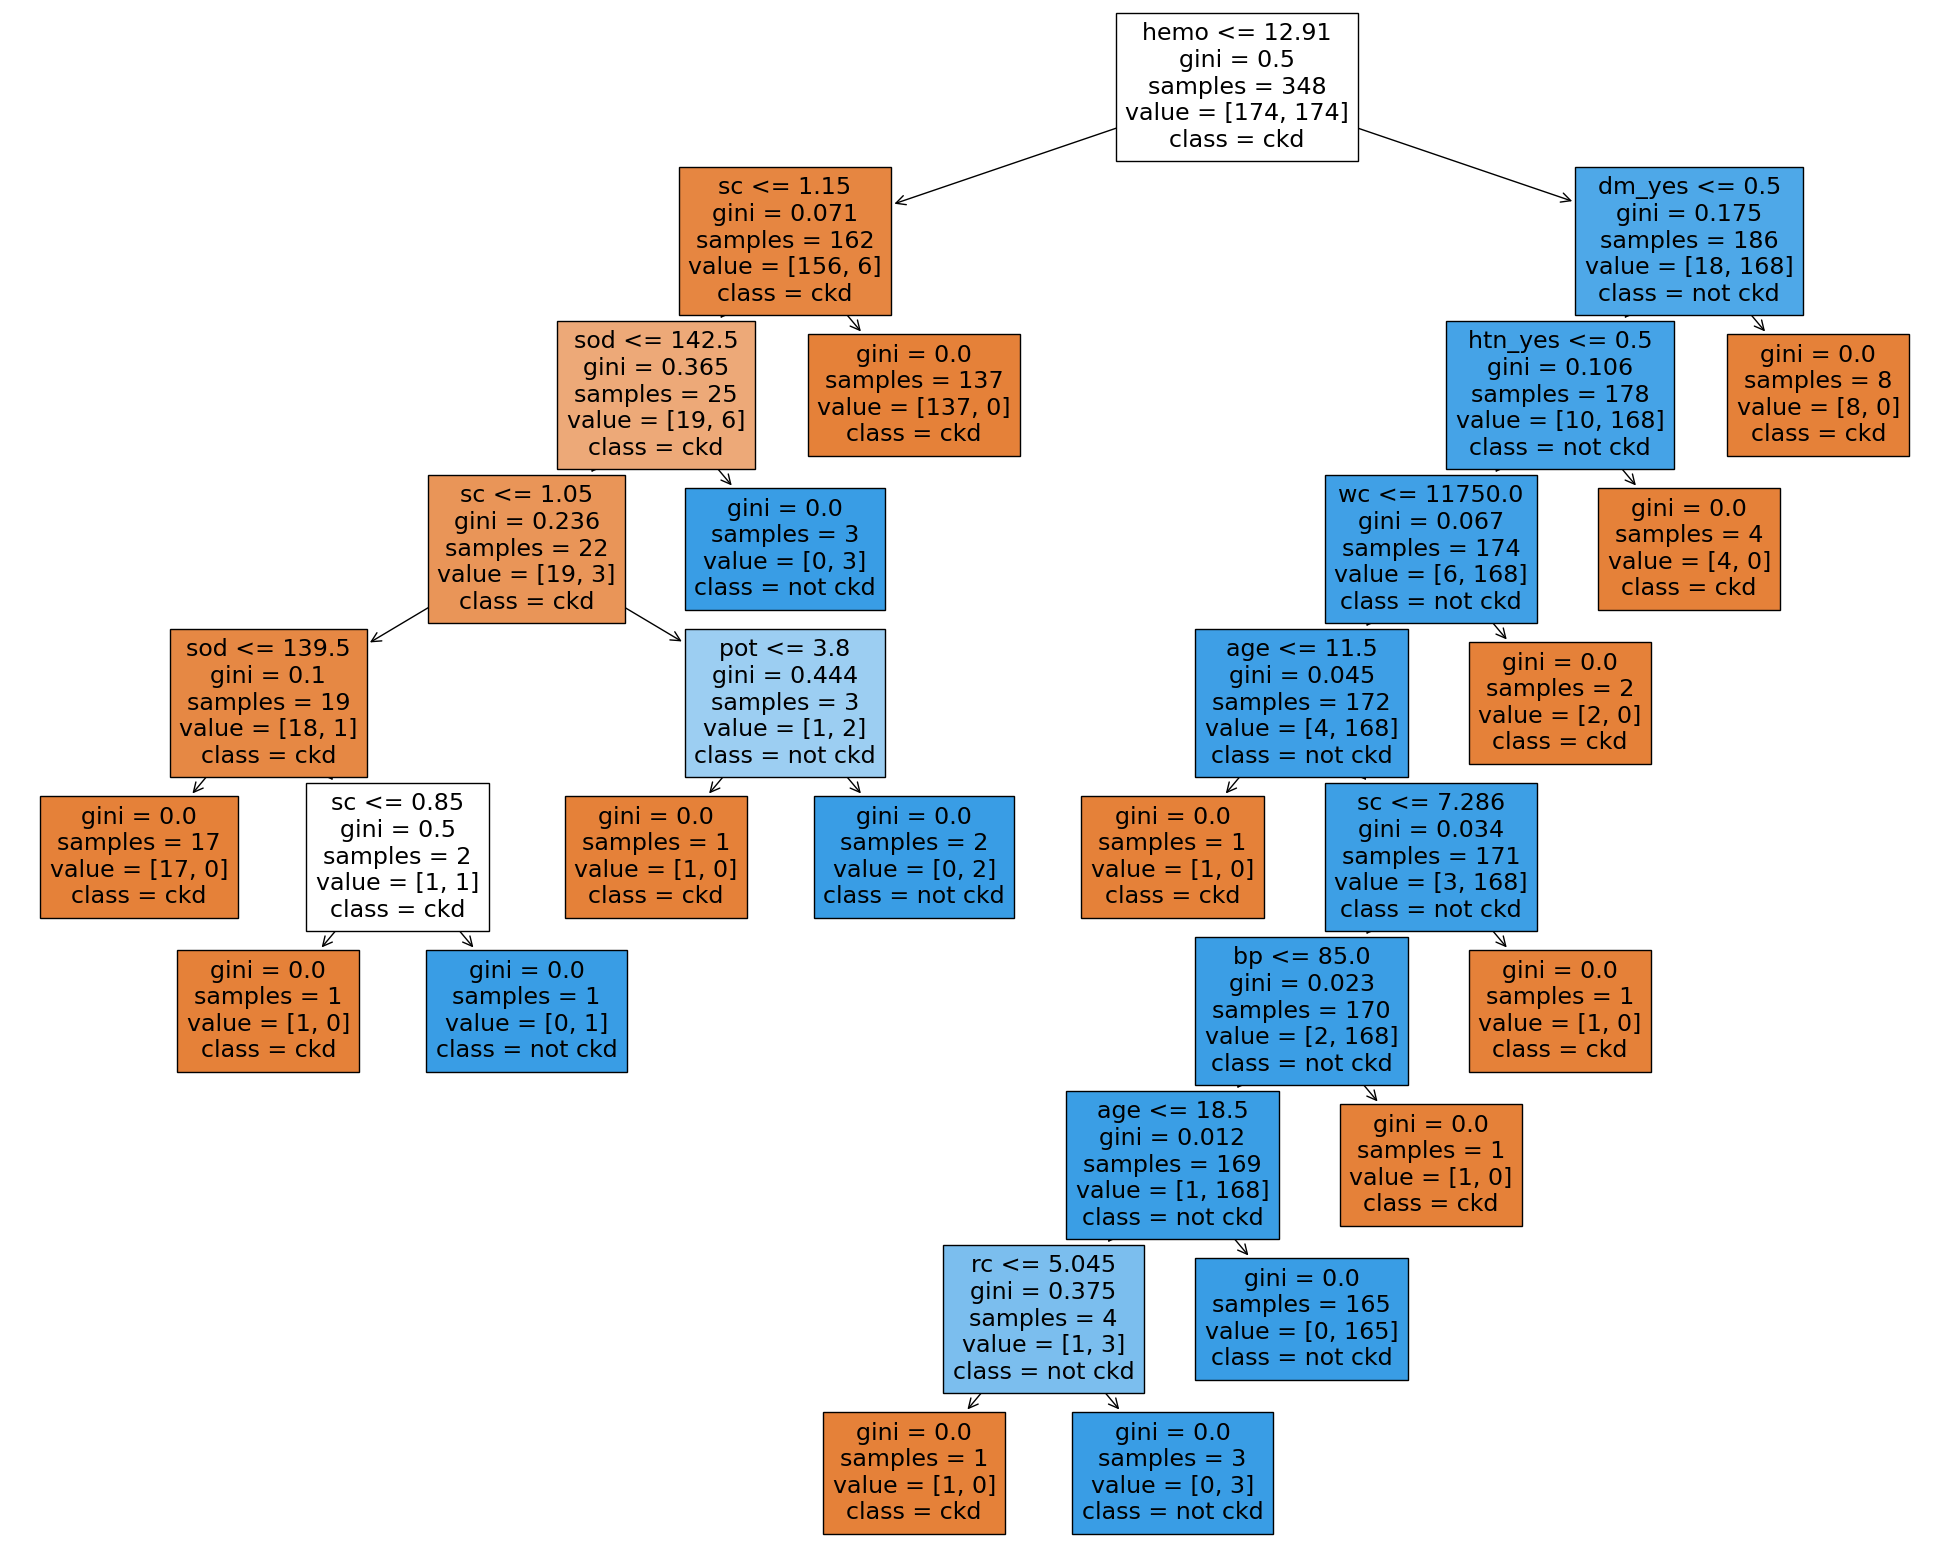

In [311]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=dt.feature_names_in_,  
                   class_names=['ckd','not ckd'],
                   filled=True)

# Export ML Model for production 

In [146]:
import pickle

In [151]:
pickle.dump(dt, open('../model_api/model_decisiontree_0715.pkl', 'wb'))